## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [40]:
#numpy.linspace(start, stop, num=50)
x=np.linspace(0,20)
print(len(x))
a=-1
b=2

50


In [5]:
y=(a*x)+b

In [41]:
print(y)#10 x 5
type(y)

[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.83673469
 -10.24489796 -10.65306122 -11.06122449 -11.46938776 -11.87755102
 -12.28571429 -12.69387755 -13.10204082 -13.51020408 -13.91836735
 -14.32653061 -14.73469388 -15.14285714 -15.55102041 -15.95918367
 -16.36734694 -16.7755102  -17.18367347 -17.59183673 -18.        ]


numpy.ndarray

#### Plot your data points. 

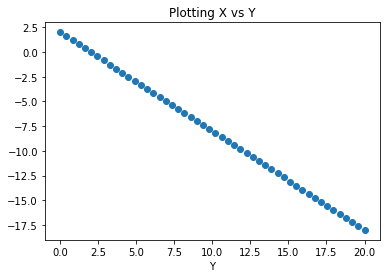

In [42]:
plt.scatter(x,y)
plt.xlabel("X")
plt.xlabel("Y")
plt.title("Plotting X vs Y")
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

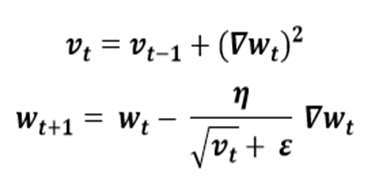

In [43]:
def Adagrad(x, y, alpha, epochs, epsilon):
    theta0=theta1=0.0
    all_prediction = []
    m = len(x)
    thetas0 = []
    thetas1 = []
    loss = np.array([])
    e = 1e-8
    accum_grad0 = accum_grad1 = 0.0#initial values for vt0, vt1
    for i in range(epochs):
        y_pred = theta0+theta1*x
        all_prediction.append(y_pred)
        thetas0.append(theta0)
        thetas1.append(theta1)
        loss = np.append(loss, np.sum((y_pred-y)**2)/(2*m))#gradient
        grad0 = np.sum((y_pred-y))/m # this is the delta theta
        grad1 = np.sum((y_pred-y)@x)/m
        total_grad = [grad0, grad1]
        accum_grad0 +=(grad0)**2 #v0
        accum_grad1 +=(grad1)**2 #v1
        theta0 = theta0 - (alpha/np.sqrt(accum_grad0+e))*grad0
        theta1 = theta1 - (alpha/np.sqrt(accum_grad1+e))*grad1
        #condition
        if np.linalg.norm(total_grad)<=e:
            return thetas0, thetas1, loss, all_prediction, theta0, theta1
        

    
    return thetas0, thetas1, loss, all_prediction, theta0, theta1

In [47]:
thetas0, thetas1, loss, all_prediction, theta0, theta1 = Adagrad(x, y, 0.1, 100, 1e-8)
adagrad_pred = all_prediction[-1]
print("Thetas values: ", theta0, theta1)

Thetas values:  -0.532451749019436 -0.8024958352811052


In [48]:
r2_score(y,all_prediction[-1])

0.9519131978341275

# fitted line

Text(0, 0.5, 'y')

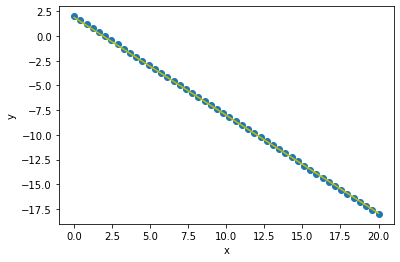

In [11]:
plt.scatter(x,y)
plt.plot(x, all_prediction[-1],color = 'y')
plt.xlabel('x')
plt.ylabel('y')

# loss vs epochs

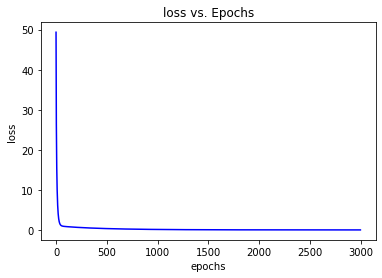

In [12]:
epochs=list(range(len(loss)))
plt.plot(epochs,loss,color = 'b')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss vs. Epochs")
plt.show()

# regression lines

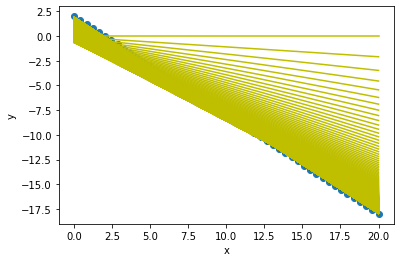

In [13]:
plt.scatter(x,y)
for i in range(len(all_prediction)):
    plt.plot(x,all_prediction[i],color = 'y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:

def my_r2_score(y,y_pred):
    ssr = np.sum((y_pred - y)**2)
    sst = np.sum((y - np.mean(y))**2)
    r2_score = 1 - (ssr/sst)
    return r2_score

#i don't know why the built in one don't work.
my_r2_score(y,all_prediction[-1])

0.9998936504339719

# change the alpha 

In [15]:
thetas0,thetas1,loss,all_prediction,theta0,theta1=Adagrad(x,y,0.01,20000,1e-9)
my_r2_score(y,all_prediction[-1])

0.9672319781674865

# thetas0 VS loss

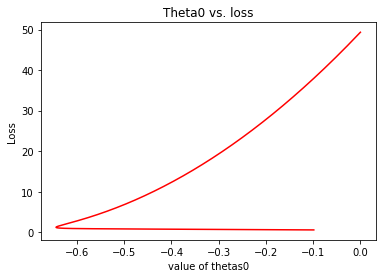

In [16]:
plt.plot(thetas0,loss, color = 'r')
plt.xlabel("value of thetas0")
plt.ylabel("Loss")
plt.title("Theta0 vs. loss")
plt.show()

# thetas1 vs loss

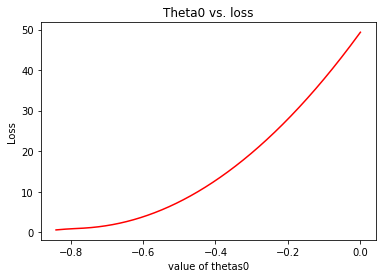

In [17]:
plt.plot(thetas1,loss, color = 'r')
plt.xlabel("value of thetas0")
plt.ylabel("Loss")
plt.title("Theta0 vs. loss")
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

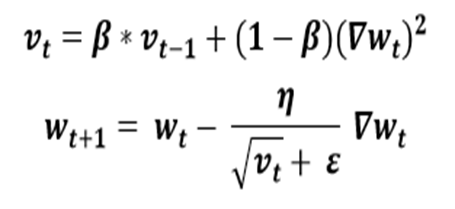

In [54]:
def RMSProp(x, y, alpha, epochs, epsilon, gamma):
    theta0=theta1=0.0
    all_prediction = []
    m = len(x)
    thetas0 = []
    thetas1 = []
    loss = np.array([])
    e = 1e-8
    accum_grad0 = accum_grad1 = 0.0#initial values for vt0, vt1
    for i in range(epochs):
        y_pred = theta0+theta1*x
        all_prediction.append(y_pred)
        thetas0.append(theta0)
        thetas1.append(theta1)
        loss = np.append(loss, np.sum((y_pred-y)**2)/(2*m))#gradient
        grad0 = np.sum((y_pred-y))/m # this is the delta theta
        grad1 = np.sum((y_pred-y)@x)/m
        total_grad = [grad0, grad1]
        
        accum_grad0 =accum_grad0*gamma+0.1*(grad0**2)
        accum_grad1=accum_grad1*gamma+0.1*(grad1**2) #v1
        
        theta0 = theta0 - (alpha/np.sqrt(accum_grad0+e))*grad0
        theta1 = theta1 - (alpha/np.sqrt(accum_grad1+e))*grad1
        if np.linalg.norm(total_grad)<=1:
            return thetas0, thetas1, loss, all_prediction, theta0, theta1
        

    
    return thetas0, thetas1, loss, all_prediction, theta0, theta1

In [55]:
thetas0, thetas1, loss, all_prediction, theta0, theta1 = RMSProp(x, y, 0.01, 10000,1e-3,0.9)
adagrad_pred = all_prediction[-1]
print("Thetas values: ", theta0, theta1)


Thetas values:  -0.4849464072289205 -0.8102176045313577


In [56]:
my_r2_score(y,all_prediction[-1])

0.9536284816404965

# loss vs epochs

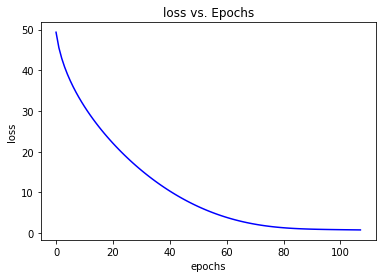

In [57]:
epochs=list(range(len(loss)))

plt.plot(epochs,loss, color = 'b')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss vs. Epochs")
plt.show()

# all lines

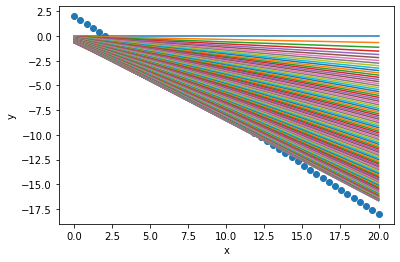

In [58]:
plt.scatter(x,y)
for i in range(len(all_prediction)):
    plt.plot(x,all_prediction[i])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# fitted line

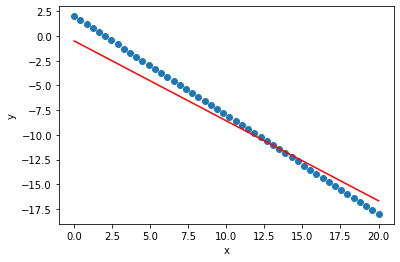

In [59]:
plt.scatter(x,y)
plt.plot(x,all_prediction[-1],color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

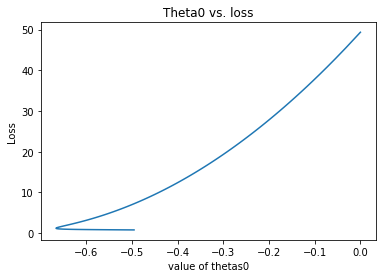

In [60]:
plt.plot(thetas0,loss)
plt.xlabel("value of thetas0")
plt.ylabel("Loss")
plt.title("Theta0 vs. loss");

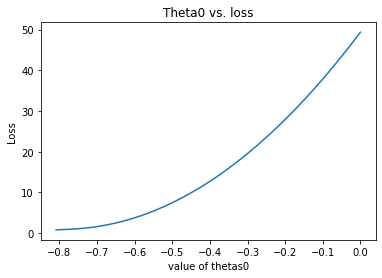

In [61]:
plt.plot(thetas1,loss)
plt.xlabel("value of thetas0")
plt.ylabel("Loss")
plt.title("Theta0 vs. loss");

In [62]:

thetas0,thetas1,losses,allpredictions,theta0,theta1=RMSProp(x,y,0.0001,10000,1e-3,0.01)
my_r2_score(y,allpredictions[-1])

0.947427350696605

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

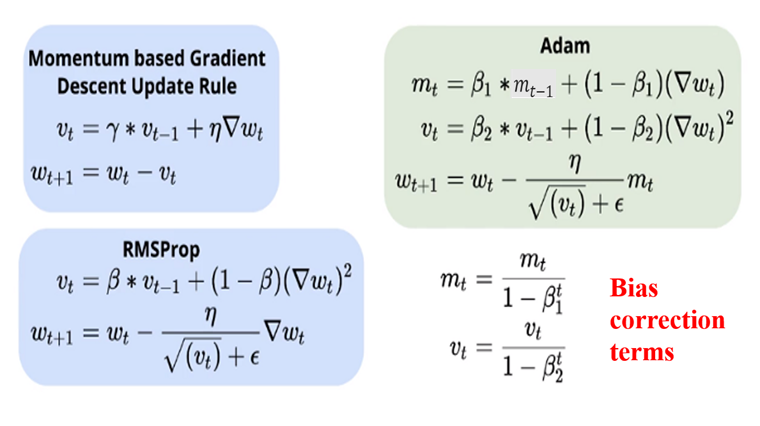

In [51]:
def Adam(x, y, alpha, epochs, epsilon, beta1, beta2):
    theta0=theta1=0.0
    m=len(x)
    all_prediction=[]
    thetas0=[]
    thetas1=[]
    loss=np.array([])
    mt1_dash=mt0_dash=vt0_dash=vt1_dash=mt_0=mt_1=vt_0=vt_1=0.0
    e=1e-8
    for i in range(epochs):
        y_pred=theta0+theta1*x
        all_prediction.append(y_pred)
        thetas0.append(theta0)
        thetas1.append(theta1)
        loss=np.append(loss,np.sum((y_pred-y)**2)/(2*m))
        grad0=np.sum((y_pred-y))/m
        grad1=np.sum((y_pred-y)@x)/m
        total_grad=[grad0,grad1]
        #the Adam comes from two different fun 
        #1 -> momentom
        mt_0 = mt_0*beta1+(1-beta1)*grad0
        mt_1 = mt_1*beta1+(1-beta1)*grad1
        #2 -> RMs
        vt_0 = beta2*vt_0+(1-beta2)*(grad0**2)
        vt_1 = beta2*vt_1+(1-beta2)*(grad1**2)
        #dashes for momentom
        mt0_dash = mt_0/(1-beta1**(i+1))
        mt1_dash = mt_1/(1-beta1**(i+1))
        #dashes for RMs
        vt0_dash = vt_0/(1-beta2**(i+1))
        vt1_dash = vt_1/(1-beta2**(i+1))
        theta0 = theta0-(alpha/(np.sqrt(vt0_dash)+e))*mt0_dash
        theta1 = theta1-(alpha/(np.sqrt(vt1_dash)+e))*mt1_dash
        #stop condition if it close to zero
        if np.linalg.norm(total_grad)<=e:
            return thetas0, thetas1, loss, all_prediction, theta0, theta1
        
    return thetas0, thetas1, loss, all_prediction, theta0, theta1

In [52]:
thetas0, thetas1, loss, all_prediction, theta0, theta1 = Adam(x,y,0.001,10000,1e-3,0.9,0.999)
adam_pred = all_prediction[-1]
print("Thetas values: ", theta0,theta1)

Thetas values:  1.999693463169917 -0.9999768621325726


In [53]:

my_r2_score(y,all_prediction[-1])

0.9999999992954884

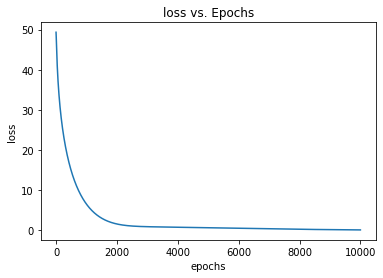

In [30]:
epoch=list(range(len(loss)))
plt.plot(epoch,loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss vs. Epochs")
plt.show()

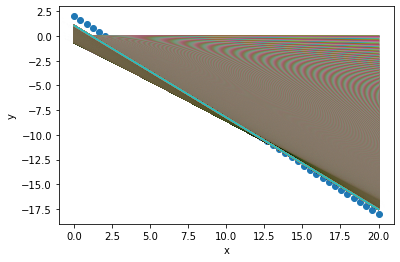

In [31]:
plt.scatter(x,y)
for i in range(len(all_prediction)):
    plt.plot(x,all_prediction[i])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

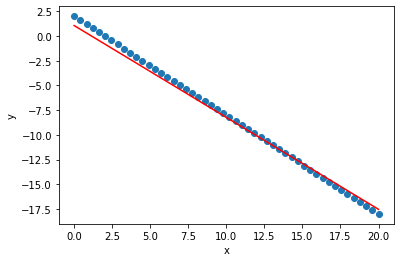

In [32]:
plt.scatter(x,y)
plt.plot(x,all_prediction[-1],color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

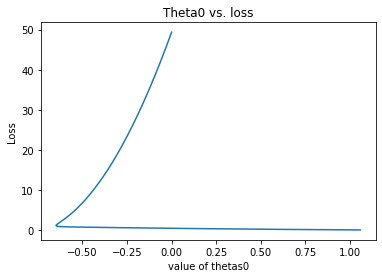

In [33]:
plt.plot(thetas0,loss)
plt.xlabel("value of thetas0")
plt.ylabel("Loss")
plt.title("Theta0 vs. loss")
plt.show()

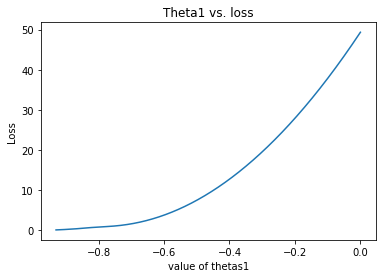

In [34]:
plt.plot(thetas1,loss)
plt.xlabel("value of thetas1")
plt.ylabel("Loss")
plt.title("Theta1 vs. loss")
plt.show()

In [ ]:
thetas0, thetas1, loss, all_prediction, theta0, theta1 = Adam(x,y,0.0001,100000,1e-3,0.1,0.999)
print("Thetas values: ", theta0,theta1)

Thetas values:  -0.3537605045492764 -0.3540203253581924


## Congratulations 
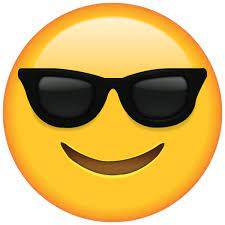